<a href="https://colab.research.google.com/github/ochekroun/labs/blob/master/IFAGE_Cours_2_MNIST_avec_Keras%2C_plus_en_d%C3%A9tails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔢 Reconnaitre des chiffres avec Keras

**Deuxième version: avec un réseau de neurones à convolution, et monitorage en utilisant W&B.**


## Installation de Keras

In [1]:
!pip install -U keras --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you'll have keras 3.3.3 which is incompatible.


In [2]:
# utilisons pytorch plutôt que tensorflow
import os
os.environ["KERAS_BACKEND"] = "torch"

## Exploration du jeu de donnée

In [3]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print("Dimension de x_train:", x_train.shape)
print(x_train.shape[0], "images d'entrainement")
print(x_test.shape[0], "images de test")

Dimension de x_train: (60000, 28, 28)
60000 images d'entrainement
10000 images de test


In [6]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [7]:
from keras.utils import to_categorical

# nombre de classe de notre modèle
num_classes = 10

# on mets les données en forme avec l'encodage "one-hot"
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Création du modèle

In [8]:
from keras import layers

In [9]:
# Réseau de neurones entièrement connecté
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(200, activation="relu", name="Première couche"),
        layers.Dense(100, activation="relu"),
        layers.Dense(75, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [10]:
# Alternative: réseau de neurones à convolution
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [11]:
# "résumé" de notre modèle
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    loss="categorical_crossentropy", # on veut optimiser la capacité de catégorisation du modèle
    optimizer="adam", # le "moteur" utilisé pour ajuster les paramètres
    metrics=["accuracy"] # ce qu'on veut monitorer: la "précision" du modèle
)

In [13]:
hist = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7651 - loss: 0.7661 - val_accuracy: 0.9748 - val_loss: 0.0881
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9632 - loss: 0.1213 - val_accuracy: 0.9850 - val_loss: 0.0573
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9733 - loss: 0.0889 - val_accuracy: 0.9843 - val_loss: 0.0523
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9792 - loss: 0.0673 - val_accuracy: 0.9867 - val_loss: 0.0438
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9800 - loss: 0.0636 - val_accuracy: 0.9888 - val_loss: 0.0369


In [14]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9855 - loss: 0.0418


[0.03500897064805031, 0.9876999855041504]

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03500897064805031
Test accuracy: 0.9876999855041504


## Visualisons la progression de l'entrainement

In [16]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.ylim(0.97, 1.0)
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

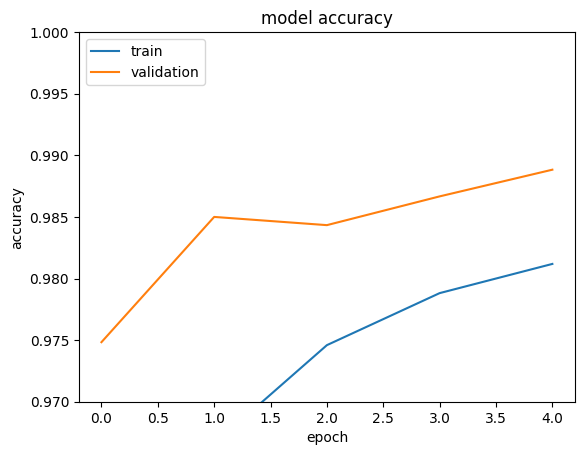

In [17]:
plot_hist(hist)

## Evaluation sur un example spécifique

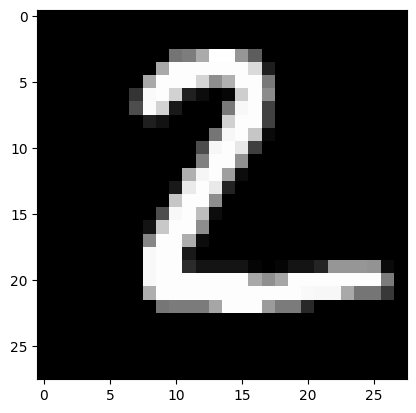

In [18]:
to_test = x_test[1]
plt.imshow(to_test, cmap="gray")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Text(0, 0.5, 'Probability')

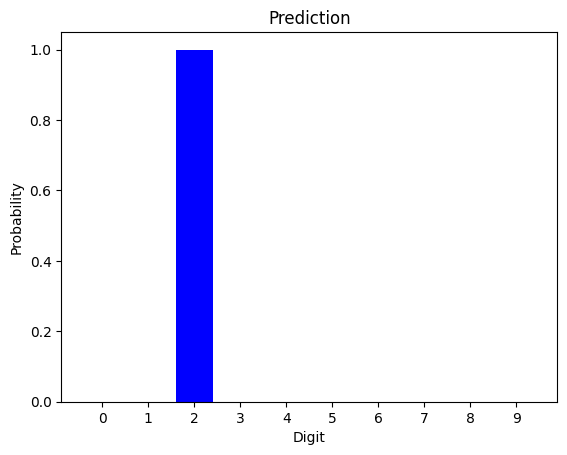

In [19]:
prediction = model.predict(np.array([to_test]))
plt.bar(range(10), prediction[0], color='blue')
plt.title('Prediction')
plt.xticks(range(10))
plt.xlabel('Digit')
plt.ylabel('Probability')

## Monitorons l'entraînement avec W&B

In [20]:
!pip install -U wandb

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
import wandb
from wandb.keras import WandbMetricsLogger

In [ ]:
wandb.login()

In [ ]:
run = wandb.init(
    project = "keras-mnist",
    config = {
        "batch_size": BATCH_SIZE
    }
)

hist = model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=5,
    validation_split=0.1,
    callbacks = [WandbMetricsLogger()]
)

run.finish()